# NNDL ASSIGNMENT 1
 Name : Gowtham thibhu T
 
 Reg no : 211722104048 

# Building a Convolutional Neural Network for Image Classification
Project Link : https://github.com/gowthamthibhu/deep_learning/blob/main/assignments/assignment3.ipynb

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_dir = r'C:\Users\gowth\OneDrive\Desktop\nnld lab\datasets\train'
validation_dir = r'C:\Users\gowth\OneDrive\Desktop\nnld lab\datasets\validation'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 17528 images belonging to 2 classes.
Found 17528 images belonging to 2 classes.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 3: Model Compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1
)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 419ms/step - accuracy: 0.5465 - loss: 0.7359 - val_accuracy: 0.5738 - val_loss: 0.6872
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - accuracy: 0.5738 - loss: 0.6796 - val_accuracy: 0.5794 - val_loss: 0.6632


In [5]:
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

548/548 ━━━━━━━━━━━━━━━━━━━━ 58s 105ms/step - accuracy: 0.5836 - loss: 0.6686
Validation Accuracy: 58.55%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


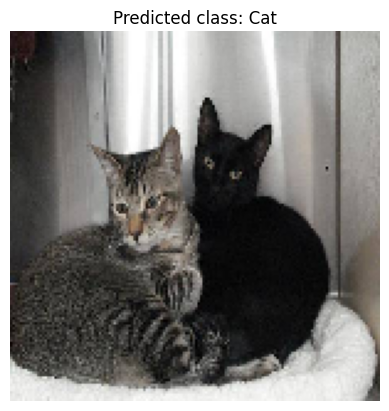

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt

new_image_path = r'C:\Users\gowth\OneDrive\Desktop\nnld lab\datasets\train\cat\cat.8.jpg'

img = load_img(new_image_path, target_size=(150, 150))  # Load the image with target size
img_array = img_to_array(img) / 255.0  # Convert image to array and normalize
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

prediction = model.predict(img_array)
predicted_class = "Dog" if prediction[0] > 0.5 else "Cat"

plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()
